**Students:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
base = pd.read_csv('NVDA 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$132.89,285722500,$130.26,$133.48,$129.42
1,10/07/2024,$127.72,346250200,$124.99,$130.64,$124.95
2,10/04/2024,$124.92,244465600,$124.94,$125.04,$121.83
3,10/03/2024,$122.85,277118000,$120.92,$124.36,$120.3401
4,10/02/2024,$118.85,221845900,$116.44,$119.38,$115.14


In [3]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [4]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,132.8900,285722500,130.2600,133.4800,129.4200
1,10/07/2024,127.7200,346250200,124.9900,130.6400,124.9500
2,10/04/2024,124.9200,244465600,124.9400,125.0400,121.8300
3,10/03/2024,122.8500,277118000,120.9200,124.3600,120.3401
4,10/02/2024,118.8500,221845900,116.4400,119.3800,115.1400
...,...,...,...,...,...,...
1253,10/15/2019,4.9093,667985200,4.7540,4.9823,4.7400
1254,10/14/2019,4.6633,210335760,4.6410,4.6843,4.6096
1255,10/11/2019,4.6498,450866800,4.6603,4.7335,4.6413
1256,10/10/2019,4.5758,327515560,4.5155,4.6270,4.5103


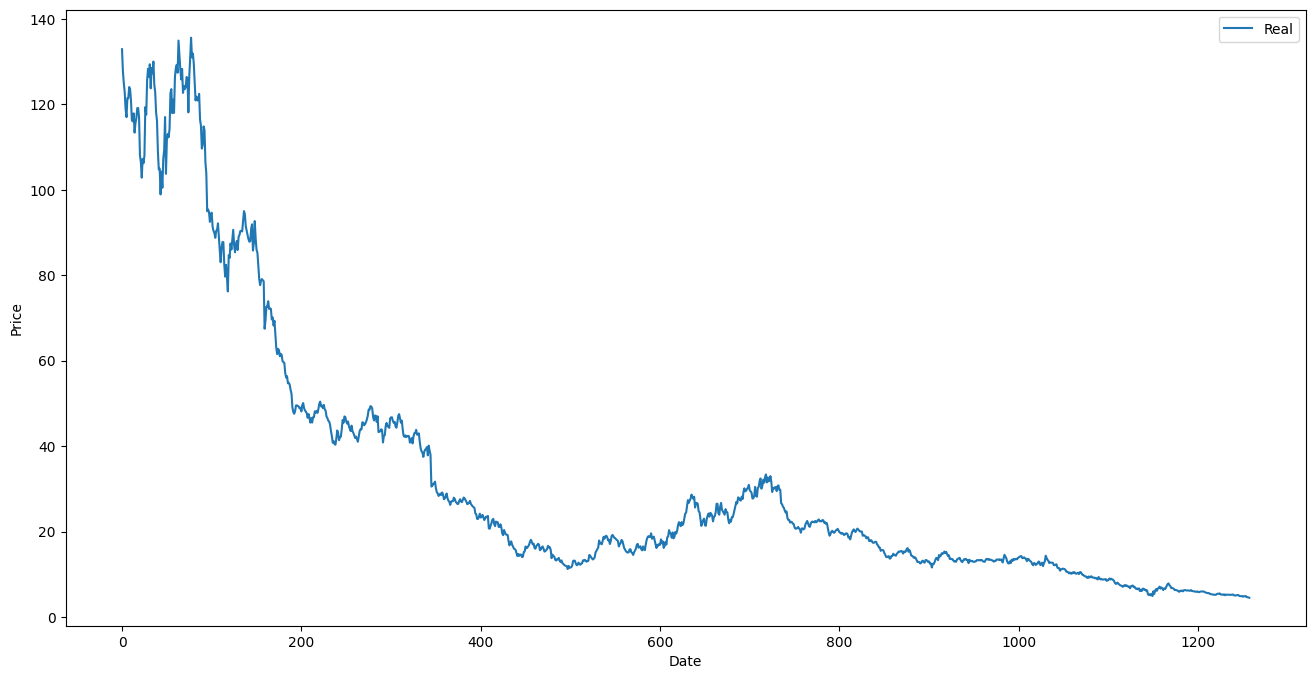

In [6]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [8]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [9]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [10]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

In [11]:
# Creating the LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0647 - mean_absolute_error: 0.1751 - val_loss: 0.0019 - val_mean_absolute_error: 0.0423
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0056 - mean_absolute_error: 0.0474 - val_loss: 5.0803e-04 - val_mean_absolute_error: 0.0212
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0368 - val_loss: 5.6840e-04 - val_mean_absolute_error: 0.0230
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0044 - mean_absolute_error: 0.0400 - val_loss: 3.0393e-04 - val_mean_absolute_error: 0.0165
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0037 - mean_absolute_error: 0.0389 - val_loss: 0.0013 - val_mean_absolute_error: 0.0352
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029 - mean_absolute_error: 0.0364 - val_loss: 3.9382e-05 - val_mean_absolute_error: 0.0054
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - mean_absolute_e

In [13]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [14]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

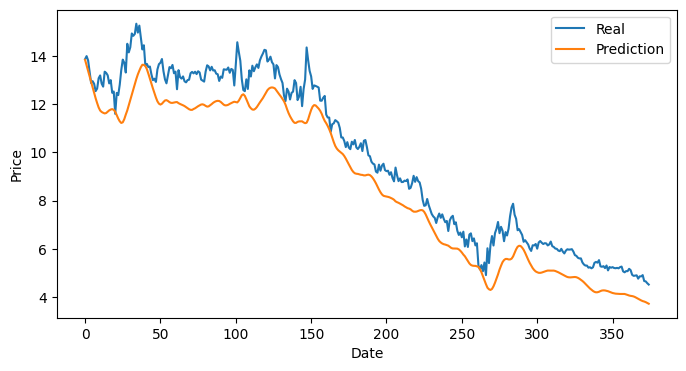

In [89]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_orig_test)), y_orig_test, label='Real')
plt.plot(range(len(test_predictions)), test_predictions, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
#R2 Score
r2 = r2_score(y_orig_test, test_predictions)
print(f'R2 Score: {r2}')

#RMSE
rmse = np.sqrt(np.mean((y_orig_test - test_predictions) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.8774363492650195
RMSE: 1.179640940764963


**ARIMA**

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [73]:
base_A = pd.read_csv('NVDA 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$132.89,285722500,$130.26,$133.48,$129.42
1,10/07/2024,$127.72,346250200,$124.99,$130.64,$124.95
2,10/04/2024,$124.92,244465600,$124.94,$125.04,$121.83
3,10/03/2024,$122.85,277118000,$120.92,$124.36,$120.3401
4,10/02/2024,$118.85,221845900,$116.44,$119.38,$115.14


In [74]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [75]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [76]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [77]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,132.89,285722500,130.26,133.48,129.4200
1,10/07/2024,127.72,346250200,124.99,130.64,124.9500
2,10/04/2024,124.92,244465600,124.94,125.04,121.8300
3,10/03/2024,122.85,277118000,120.92,124.36,120.3401
4,10/02/2024,118.85,221845900,116.44,119.38,115.1400


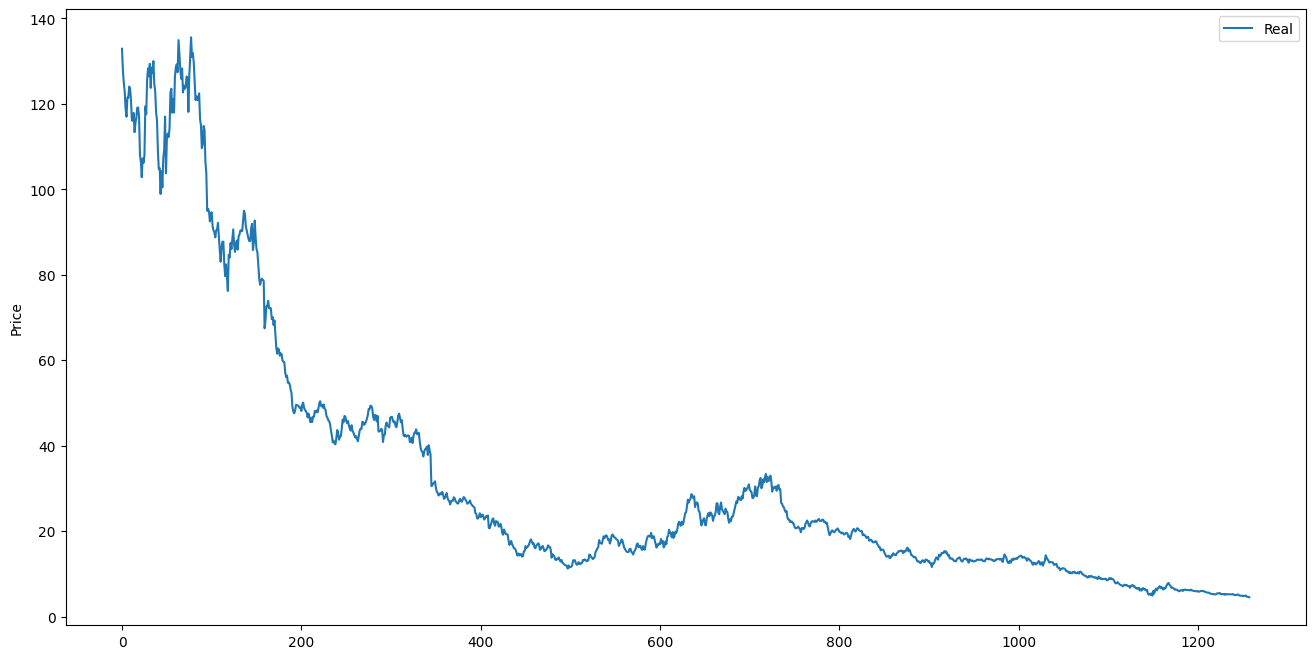

In [78]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [79]:
# Addfuller for CCI
result = adfuller(base_A['Close/Last'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6276158054127126
p-value: 0.08742289841543693


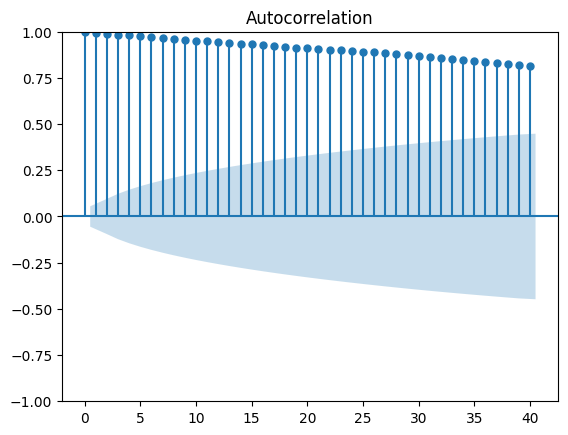

In [80]:
plot_acf(base_A['Close/Last'], lags=40)
plt.show()

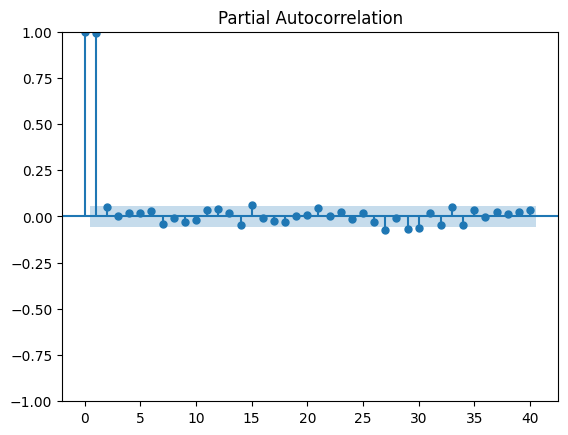

In [81]:
plot_pacf(base_A['Close/Last'], lags=40)
plt.show()

In [82]:
X = base_A['Close/Last'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

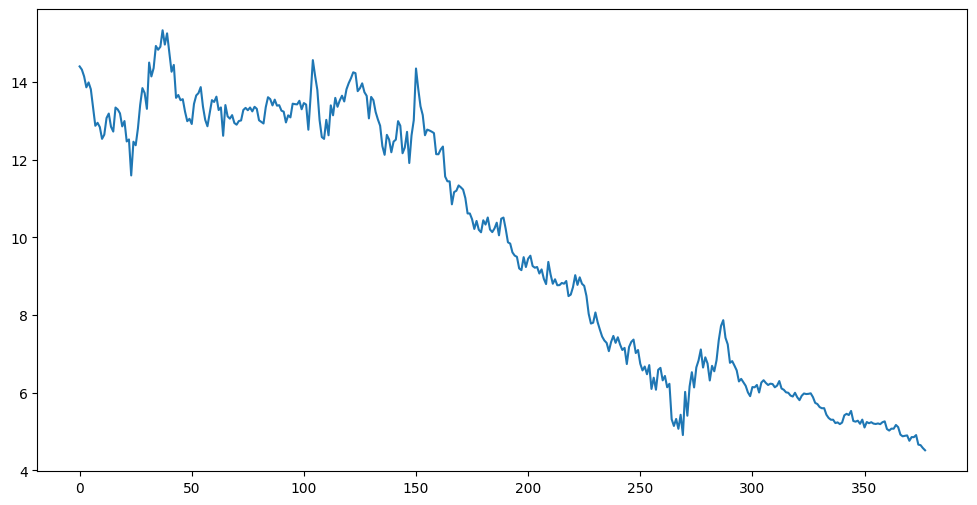

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(test)
plt.show()

In [84]:
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

Expected=15.31195607251069, Observed=14.4
Expected=14.383442708631183, Observed=14.317
Expected=14.305284414551608, Observed=14.1435
Expected=14.159901645895971, Observed=13.8615
Expected=13.866527403259921, Observed=13.9875
Expected=13.966085602644602, Observed=13.8118
Expected=13.840930919714904, Observed=13.3483
Expected=13.358991628981803, Observed=12.8718
Expected=12.884266467057651, Observed=12.9483
Expected=12.919615685243912, Observed=12.8393
Expected=12.866137550520099, Observed=12.5353
Expected=12.538059792166683, Observed=12.643
Expected=12.623454947139061, Observed=13.0708
Expected=13.054931854548183, Observed=13.1863
Expected=13.201504853923865, Observed=12.8458
Expected=12.86539656411765, Observed=12.7225
Expected=12.708662555753616, Observed=13.3413
Expected=13.300690143672579, Observed=13.2913
Expected=13.33893071535316, Observed=13.1913
Expected=13.169487656673386, Observed=12.856
Expected=12.889215866262866, Observed=12.9935
Expected=12.953335506700226, Observed=12.46

In [85]:
#RMSE
rmse = sqrt(mean_squared_error(test, forecasts))
print(f'RMSE: {rmse}')

#R2 Score
r2 = r2_score(test, forecasts)
print(f'R2 Score: {r2}')

RMSE: 0.3104787483267592
R2 Score: 0.9915612534970791


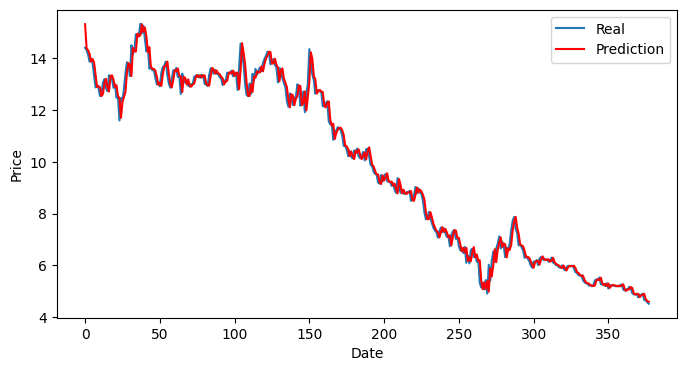

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test)), test, label='Real')
plt.plot(range(len(forecasts)), forecasts, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()